<a href="https://colab.research.google.com/github/nakulnarang/DS_notebooks/blob/main/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

In [ ]:
#convert our Y labels into{1,-1}
Y[Y==0] = -1 #broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

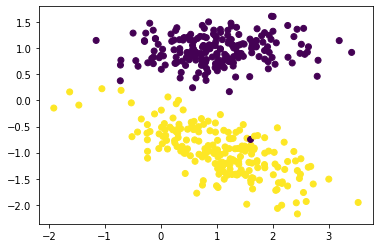

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [ ]:
import numpy as np

In [ ]:
print(X.shape)

(400, 2)


In [ ]:
class SVM:
  def __init__(self,C=1.0):
    self.C=C
    self.W=0
    self.b=0

  def hingeLoss(self,W,b,X,Y):
    loss=0.0

    loss += .5*np.dot(W,W.T)

    m = X.shape[0]

    for i in range(m):
      ti = Y[i]*(np.dot(W,X[i].T)+b)
      loss += self.C*max(0,(1-ti))

    return loss[0][0]
  
  def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
    no_of_features = X.shape[1]
    no_of_samples = X.shape[0]

    n = learning_rate
    c=self.C

    #init the model parameters
    W = np.zeros((1,no_of_features))
    bias = 0
    print(self.hingeLoss(W,bias,X,Y)) 
    #training from here
    #Weight and Bias update rule that was discussed!
    losses=[]

    for i in range(maxItr):
      #TRAINING LOOP
      l=self.hingeLoss(W,bias,X,Y)
      losses.append(l)
      ids=np.arange(no_of_samples)
      np.random.shuffle(ids)

      #Batch Gradient Descent(Paper) with random shuffling
      for batch_start in range(0,no_of_samples,batch_size):
        #Assume 0 gradient for the batch
        gradw = 0
        gradb = 0

        #Iterate over all examples in the mini batch 
        for j in range(batch_start,batch_start+batch_size):
          if j<no_of_samples:
            i=ids[j]
            ti = Y[i]*(np.dot(W,X[i].T)+bias)

            if ti>1:
              gradw += 0
              gradb += 0
            else:
              gradw += c*Y[i]*X[i]
              gradb += c*Y[i]
        #Gradient for the batch is ready! Update W,B
        W = W - n*W + n*gradw
        bias = bias + n*gradb
    self.W=W
    self.b=bias
    return W,bias,losses
        





In [ ]:
mySVM = SVM(C=1000)

In [ ]:
W,b,losses = mySVM.fit(X,Y)
print(losses)

400000.0
[400000.0, 129634.546559971, 88305.55134553596, 68899.64578783678, 57241.114316841966, 52106.0069834295, 48824.09813161911, 45559.70261310109, 42352.798335167085, 39769.272753132536, 36739.62081259554, 36693.028742867195, 35956.527322145375, 35143.17163247829, 36089.0581518159, 34780.27484268963, 34327.51559831864, 33879.24025363854, 37332.17591537132, 37493.171563877295, 33231.12638243775, 33707.40102465316, 34186.098549510345, 32508.206890844885, 32070.379556455104, 31633.692501061167, 31362.14610384327, 32780.20023162203, 31713.4845259666, 31205.72957585703, 31413.859584769336, 30293.56727851328, 30689.606959280023, 34414.45857732568, 30038.335986422808, 29662.602856079804, 29587.86180488364, 28390.819200756145, 28886.501049913753, 29891.639366235355, 27880.986089949878, 28413.902527324637, 28751.213153685345, 27797.460635690568, 29452.64558087658, 29949.86890434205, 26284.804321807023, 26211.440557897444, 26250.530435142657, 25633.58530582367, 25835.87317339293, 25122.7908

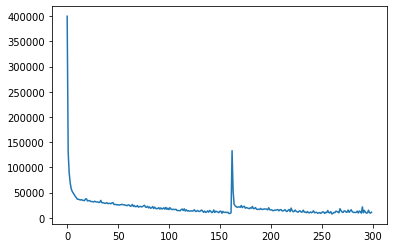

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
W,B=mySVM.W,mySVM.b
print(W,B)

[[ -5.39133302 -13.44244165]] 3.0


In [ ]:
def plotHyperplane(w1,w2,b):
  plt.figure(figsize=(12,12))
  x_1=np.linspace(-2,4,10)#wx+b=0
  x_p=-(w1*x_1+b+1)/w2#wx+b=-1
  x_n=-(w1*x_1+b-1)/w2#wx+b=1
  x_2=-(w1*x_1 +b)/w2
  plt.plot(x_1,x_p,label="hyperplane wx+b=1")
  plt.plot(x_1,x_n,label="hyperplane wx+b=-1")
  plt.plot(x_1,x_2,label="hyperplane wx+b=0")
  plt.legend
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.show()

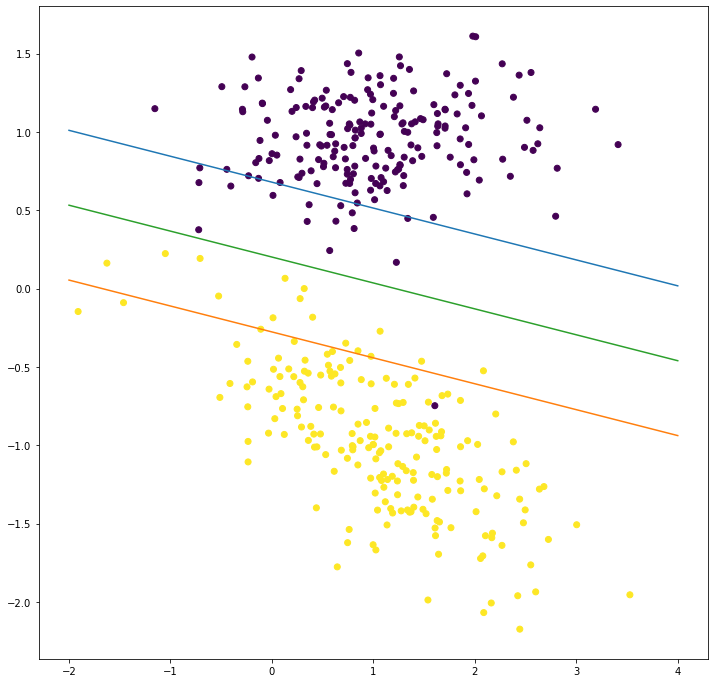

In [ ]:
plotHyperplane(W[0,0],W[0,1],B)

**Visualising Support Vectors, Positve and Negative Hyperplanes **

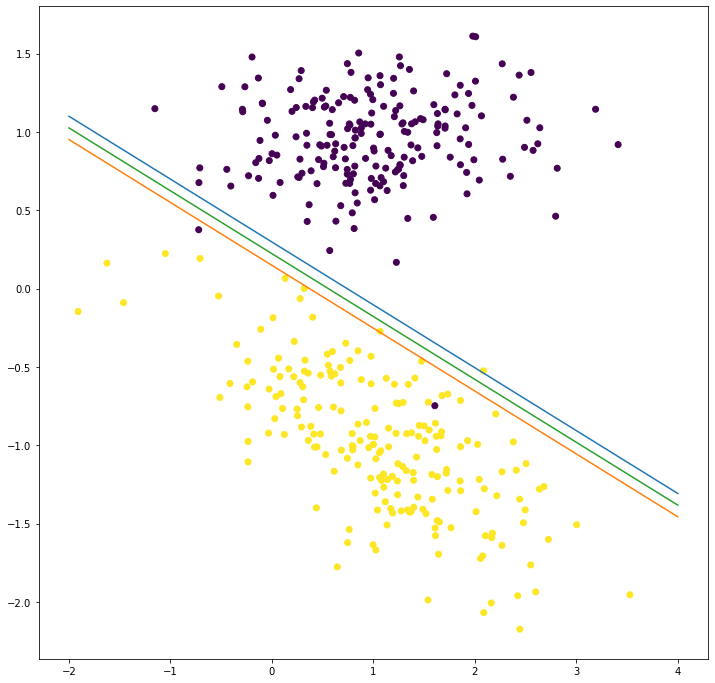

In [ ]:
plotHyperplane(W[0,0],W[0,1],B)